<a href="https://colab.research.google.com/github/Fathima-Rinsha-k/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving airline-passengers.csv to airline-passengers (2).csv
Index(['total_passengers'], dtype='object')


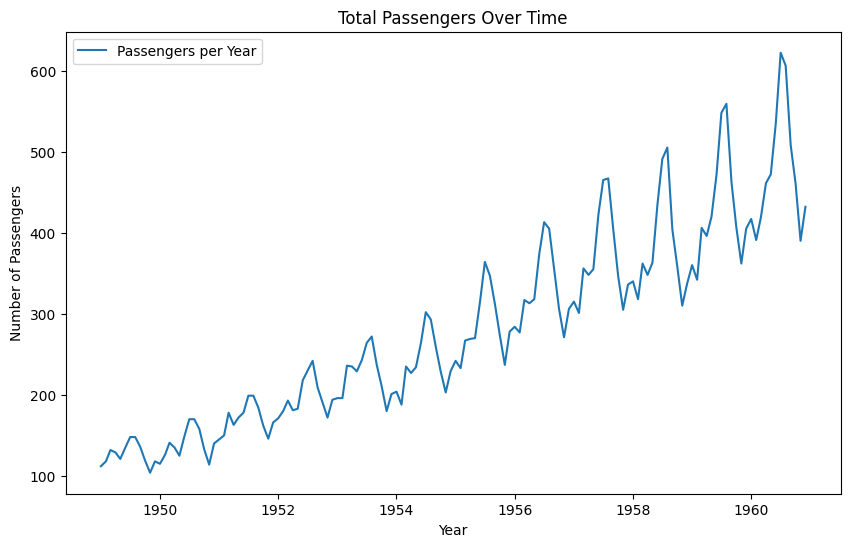

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
uploaded = files.upload()


# Load the dataset
data = pd.read_csv('airline-passengers.csv')
# Assuming the column containing year information is 'month'
# Convert the 'month' column to datetime, assuming format is Year-Month ('%Y-%m')
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.set_index('month', inplace=True) # Set 'month' as index

# Print the column names to verify the change
print(data.columns)

# Extract the Passengers column (now 'total_passengers')
series = data['total_passengers']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(series, label='Passengers per Year')
plt.title('Total Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


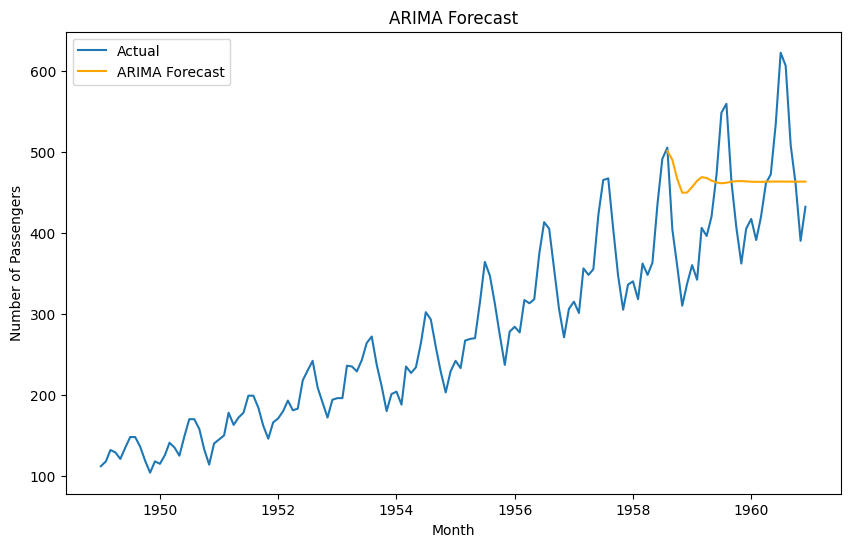

In [ ]:
# ------------------ ARIMA Model ------------------
# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust the order as needed
arima_result = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_result.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1074
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0749
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0516
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0432
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0205
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0166
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0182
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0146
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

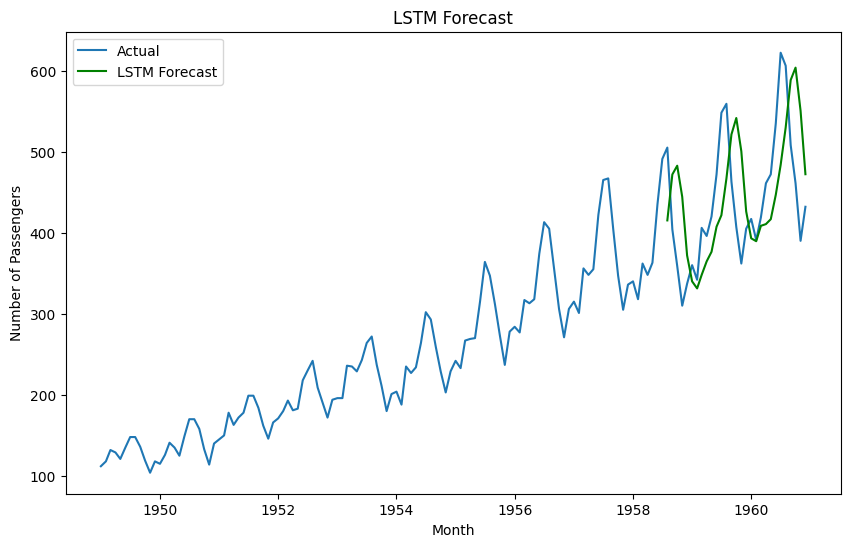

In [ ]:
# ------------------ LSTM Model ------------------
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(test.index, lstm_predictions, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
